<a href="https://colab.research.google.com/github/najibur-rahman/Machine-Learning/blob/main/insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Import all the requested models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [ ]:
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
# first row of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Categorical features :

gender
smoker
region

In [ ]:
insurance_dataset.shape

(1338, 7)

In [ ]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

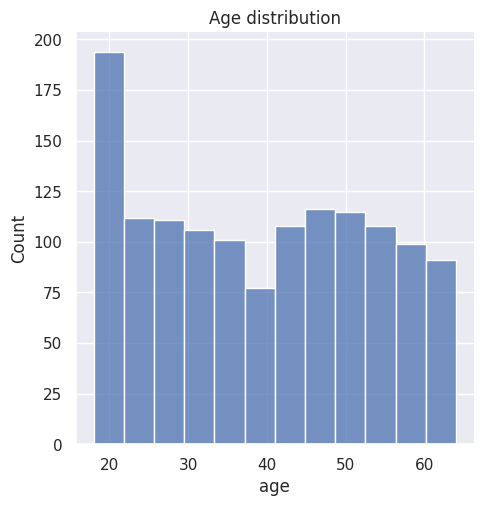

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()

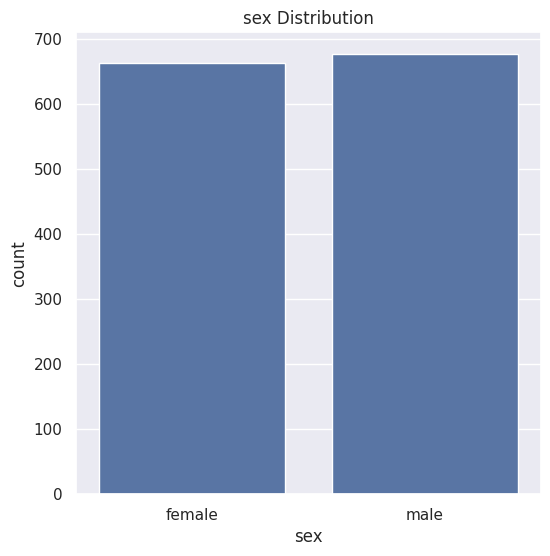

In [ ]:
# gender features
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('sex Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


<Figure size 600x600 with 0 Axes>

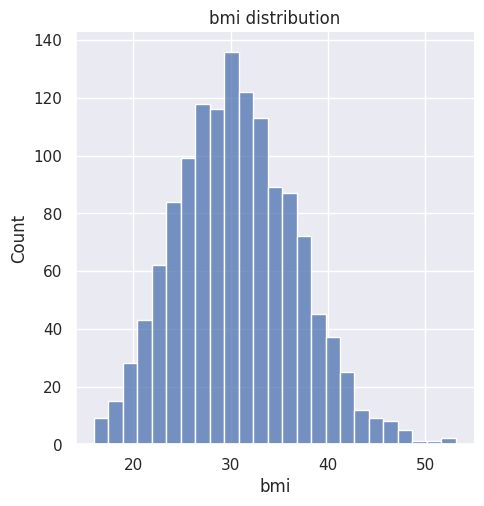

In [ ]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('bmi distribution')
plt.show()

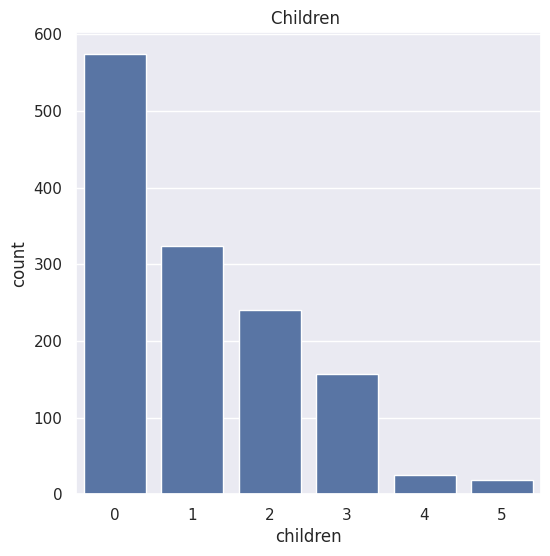

In [ ]:
# childred distribution
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children ')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


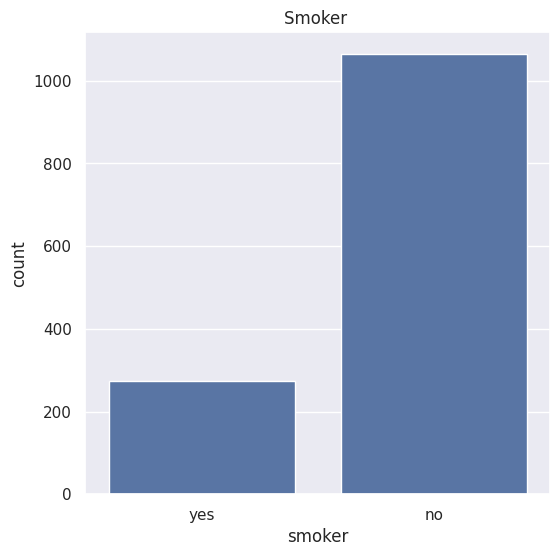

In [ ]:
# Smoker distribution
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker ')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


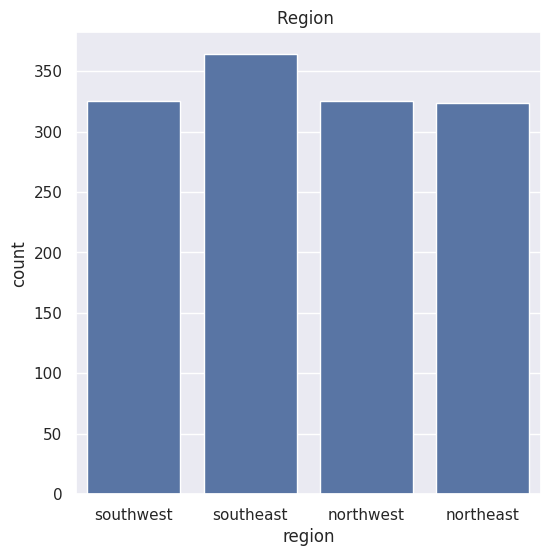

In [ ]:
# region distribution
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region ')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


/tmp/ipython-input-509956326.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


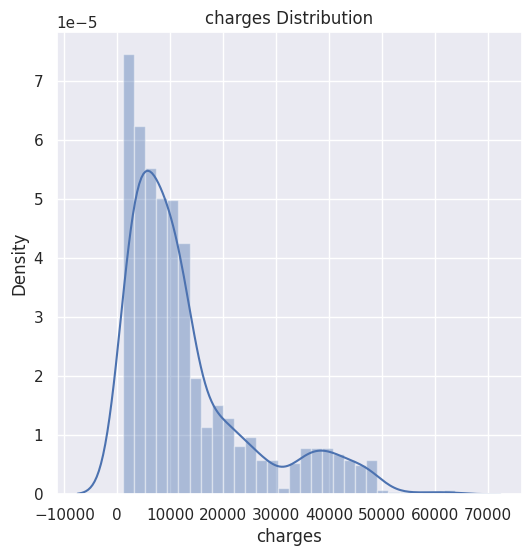

In [ ]:
# charge
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges Distribution')
plt.show()

In [ ]:
# Label encoding
# Gender: male=1, female=0
insurance_dataset.replace({'sex':{'male':1, 'female':0}}, inplace=True)

# Smoker: yes=0, no=1
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# Region: southeast=0, southwest=1, northeast=2, northwest=3
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)


/tmp/ipython-input-3395339915.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':1, 'female':0}}, inplace=True)
/tmp/ipython-input-3395339915.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
/tmp/ipython-input-3395339915.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in 

In [ ]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,0,1725.55230
2,28,1,33.000,3,1,0,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520


In [ ]:
# Drop the claim features

x = insurance_dataset.drop(columns=['charges'])
y = insurance_dataset[['charges']]

print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       0       1
1      18    1  33.770         1       1       0
2      28    1  33.000         3       1       0
3      33    1  22.705         0       1       3
4      32    1  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       1       3
1334   18    0  31.920         0       1       2
1335   18    0  36.850         0       1       0
1336   21    0  25.800         0       1       1
1337   61    0  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(y)

          charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]


In [ ]:
# splitting the training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)



Running Linear Regression...
MSE: 33685623.35
R square value: 0.7830
R2 (as %): 78.30%


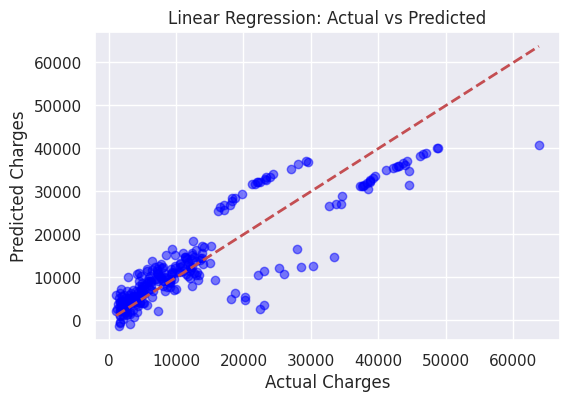

In [ ]:
print("\nRunning Linear Regression...")
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)
prediction_lr = regressor_lr.predict(x_test)

# Calculation
mse_lr = mean_squared_error(y_test, prediction_lr)
r2_lr = r2_score(y_test, prediction_lr)

print(f"MSE: {mse_lr:.2f}")
print(f"R square value: {r2_lr:.4f}")
print(f"R2 (as %): {r2_lr * 100:.2f}%")

plt.figure(figsize=(6, 4))
plt.scatter(y_test, prediction_lr, color='blue', alpha=0.5)
y_min = y_test.min().item() if hasattr(y_test.min(), 'item') else y_test.min()
y_max = y_test.max().item() if hasattr(y_test.max(), 'item') else y_test.max()
plt.plot([y_min, y_max], [y_min, y_max], 'r--', lw=2)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.grid(True)
plt.show()


Running Ridge Regression...
MSE: 33730428.95
R square value: 0.7827
Accuracy: 78.27%


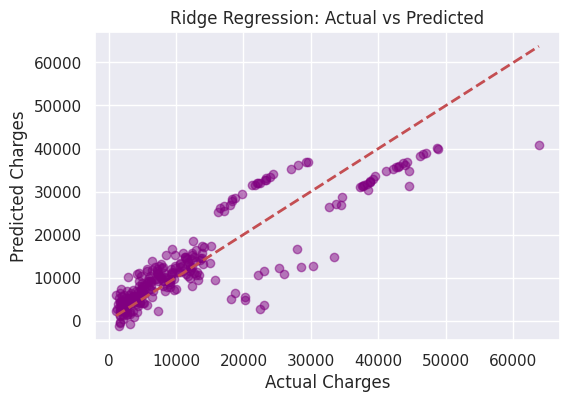

In [ ]:
#  Ridge Regression

print("\nRunning Ridge Regression...")
regressor_ridge = Ridge(alpha=1.0)
regressor_ridge.fit(x_train, y_train)
prediction_ridge = regressor_ridge.predict(x_test)

mse_ridge = mean_squared_error(y_test, prediction_ridge)
r2_ridge = r2_score(y_test, prediction_ridge)
accuracy_ridge = r2_ridge * 100

print(f"MSE: {mse_ridge:.2f}")
print(f"R square value: {r2_ridge:.4f}")
print(f"Accuracy: {accuracy_ridge:.2f}%")

plt.figure(figsize=(6, 4))
plt.scatter(y_test, prediction_ridge, color='purple', alpha=0.5)
plt.plot([y_test.values.min(), y_test.values.max()], [y_test.values.min(), y_test.values.max()], 'r--', lw=2)
plt.title("Ridge Regression: Actual vs Predicted")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.grid(True)
plt.show()


Running Lasso Regression...
MSE: 33690488.06
R square value: 0.7830
Accuracy: 78.30%


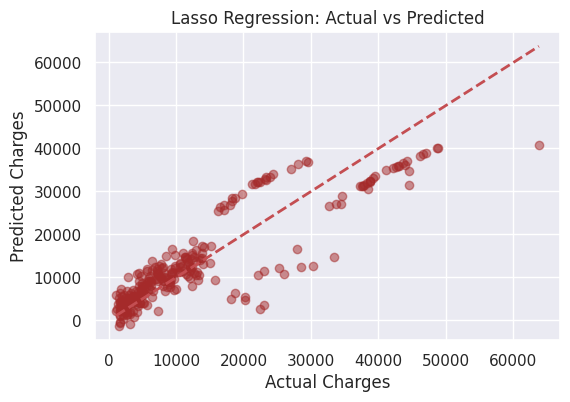

In [ ]:
#  Lasso Regression

print("\nRunning Lasso Regression...")
regressor_lasso = Lasso(alpha=1.0)
regressor_lasso.fit(x_train, y_train)
prediction_lasso = regressor_lasso.predict(x_test)

mse_lasso = mean_squared_error(y_test, prediction_lasso)
r2_lasso = r2_score(y_test, prediction_lasso)
accuracy_lasso = r2_lasso * 100

print(f"MSE: {mse_lasso:.2f}")
print(f"R square value: {r2_lasso:.4f}")
print(f"Accuracy: {accuracy_lasso:.2f}%")

plt.figure(figsize=(6, 4))
plt.scatter(y_test, prediction_lasso, color='brown', alpha=0.5)
plt.plot([y_test.values.min(), y_test.values.max()], [y_test.values.min(), y_test.values.max()], 'r--', lw=2)
plt.title("Lasso Regression: Actual vs Predicted")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.grid(True)
plt.show()


Running Decision Tree...
MSE: 25610915.13
R square value: 0.8350
Accuracy: 83.50%


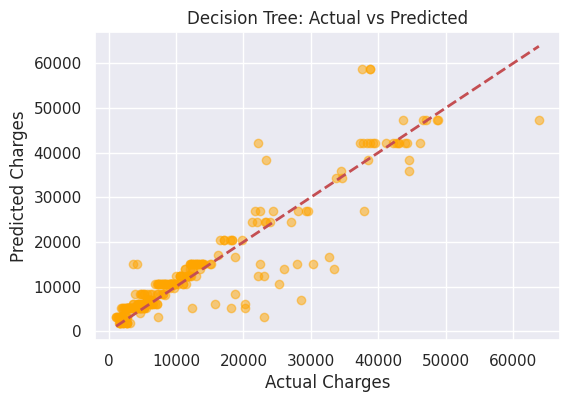

In [ ]:
#  Decision Tree Regressor
print("\nRunning Decision Tree...")
regressor_dt = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor_dt.fit(x_train, y_train)
prediction_dt = regressor_dt.predict(x_test)

mse_dt = mean_squared_error(y_test, prediction_dt)
r2_dt = r2_score(y_test, prediction_dt)
accuracy_dt = r2_dt * 100

print(f"MSE: {mse_dt:.2f}")
print(f"R square value: {r2_dt:.4f}")
print(f"Accuracy: {accuracy_dt:.2f}%")

plt.figure(figsize=(6, 4))
plt.scatter(y_test, prediction_dt, color='orange', alpha=0.5)
plt.plot([y_test.values.min(), y_test.values.max()], [y_test.values.min(), y_test.values.max()], 'r--', lw=2)
plt.title("Decision Tree: Actual vs Predicted")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.grid(True)
plt.show()


Running Random Forest...
MSE: 19590171.09
R square value: 0.8738
Accuracy: 87.38%


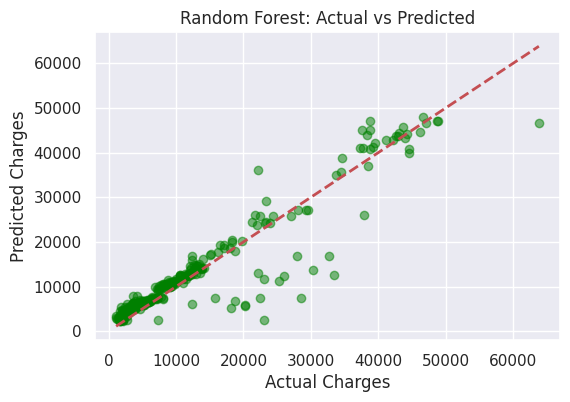

In [ ]:
#  Random Forest Regressor

print("\nRunning Random Forest...")
regressor_rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
regressor_rf.fit(x_train, y_train.values.ravel())
prediction_rf = regressor_rf.predict(x_test)

mse_rf = mean_squared_error(y_test, prediction_rf)
r2_rf = r2_score(y_test, prediction_rf)
accuracy_rf = r2_rf * 100

print(f"MSE: {mse_rf:.2f}")
print(f"R square value: {r2_rf:.4f}")
print(f"Accuracy: {accuracy_rf:.2f}%")

plt.figure(figsize=(6, 4))
plt.scatter(y_test, prediction_rf, color='green', alpha=0.5)
plt.plot([y_test.values.min(), y_test.values.max()], [y_test.values.min(), y_test.values.max()], 'r--', lw=2)
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.grid(True)
plt.show()


Running Gradient Boosting...
MSE: 18690968.10
R square value: 0.8796
Accuracy: 87.96%


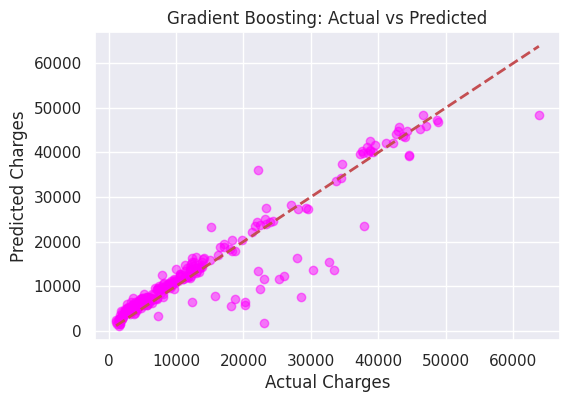

In [ ]:
#  Gradient Boosting Regressor

print("\nRunning Gradient Boosting...")
regressor_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
regressor_gb.fit(x_train, y_train.values.ravel())
prediction_gb = regressor_gb.predict(x_test)

mse_gb = mean_squared_error(y_test, prediction_gb)
r2_gb = r2_score(y_test, prediction_gb)
accuracy_gb = r2_gb * 100

print(f"MSE: {mse_gb:.2f}")
print(f"R square value: {r2_gb:.4f}")
print(f"Accuracy: {accuracy_gb:.2f}%")

plt.figure(figsize=(6, 4))
plt.scatter(y_test, prediction_gb, color='magenta', alpha=0.5)
plt.plot([y_test.values.min(), y_test.values.max()], [y_test.values.min(), y_test.values.max()], 'r--', lw=2)
plt.title("Gradient Boosting: Actual vs Predicted")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.grid(True)
plt.show()

In [ ]:
test_data_predict = regressor_lr.predict(x_test)

r2_test = metrics.r2_score(y_test, test_data_predict)
accuracy_test = r2_test * 100

print(f"R square value is : {r2_test:.4f}")
print(f"Accuracy: {accuracy_test:.2f}%")

R square value is : 0.7830
Accuracy: 78.30%


In [ ]:
# age
# Gender: male=1, female=0
# bmi
# children
# Smoker: yes=0, no=1
# Region: southeast=0, southwest=1, northeast=2, northwest=3

#input_data = (63, 1, 35.09, 0, 0, 0)
input_data = (56, 1, 40.3, 0, 1, 1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor_gb.predict(input_data_reshaped)
print(prediction)

[11812.85058281]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Running Model Comparison...
Model Accuracy Ranking (High to Low):
Gradient Boosting    : 87.96%
Random Forest        : 87.38%
Decision Tree        : 83.50%
Linear Regression    : 78.30%
Lasso                : 78.30%
Ridge                : 78.27%


/tmp/ipython-input-695103073.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')


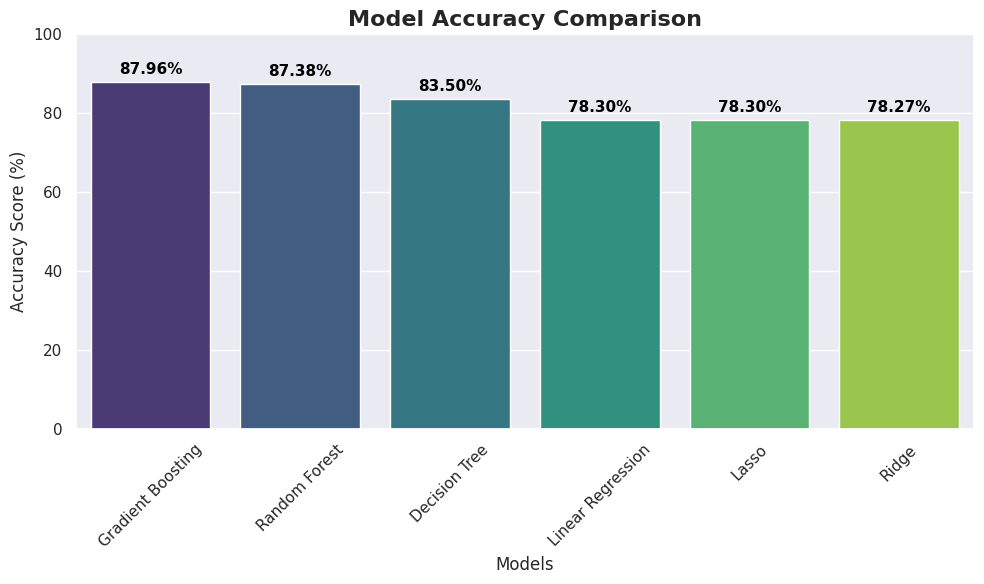

In [ ]:
# Model Comparison

print("Running Model Comparison...")
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

results = {}

for name, model in models.items():

    if name in ["Random Forest", "Gradient Boosting"]:
        model.fit(x_train, y_train.values.ravel())
    else:
        model.fit(x_train, y_train)

    pred = model.predict(x_test)
    r2 = r2_score(y_test, pred)
    accuracy = r2 * 100
    results[name] = accuracy

# Sorting results
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("Model Accuracy Ranking (High to Low):")
for name, acc in sorted_results:
    print(f"{name:<20} : {acc:.2f}%")




# Plot
model_names = [item[0] for item in sorted_results]
accuracy_scores = [item[1] for item in sorted_results]
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')

plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy Score (%)', fontsize=12)
plt.ylim(0, 100)

plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=11,
                fontweight='bold',
                color='black')

plt.tight_layout()
plt.show()


In [ ]:
# Feature Impact Check

print("Checking price by adding features one by one...")

# need input from user

# age
# sex: male=1, female=0
# bmi
# children
# Smoker: yes=0, no=1
# Region: southeast=0, southwest=1, northeast=2, northwest=3

input_values = [63, 1, 35.09, 0, 0, 0]
feature_list = list(x.columns)

# using Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

print(f"{'Features Used':<45} | {'Predicted Charge':<15}")
print("-" * 65)

for i in range(2, len(feature_list) + 1):
    selected_features = feature_list[:i]

    X_train_sub = x_train[selected_features]
    gb_model.fit(X_train_sub, y_train.values.ravel())

    input_sub = np.array(input_values[:i]).reshape(1, -1)

    pred_charge = gb_model.predict(input_sub)[0]

    feat_str = ", ".join(selected_features)
    print(f"{feat_str:<45} | ${pred_charge:,.2f}")


Checking Price by adding features one by one...
Features Used                                 | Predicted Charge
-----------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


age, sex                                      | $15,756.59


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


age, sex, bmi                                 | $20,784.42
age, sex, bmi, children                       | $18,602.05
age, sex, bmi, children, smoker               | $45,476.09
age, sex, bmi, children, smoker, region       | $45,901.01


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Training Best Model (Gradient Boosting)...

Calculating Feature Importance using SHAP...
Most imporatant features is: 'SMOKER'

Ranking (Impact in Dollar Amount $):
1. smoker     : $7,686.27 impact on average
2. age        : $3,305.27 impact on average
3. bmi        : $2,155.48 impact on average
4. children   : $633.35 impact on average
5. region     : $330.93 impact on average
6. sex        : $181.96 impact on average


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/tmp/ipython-input-1659053467.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Impact_Score', y='Feature', data=importance_df, palette='viridis')


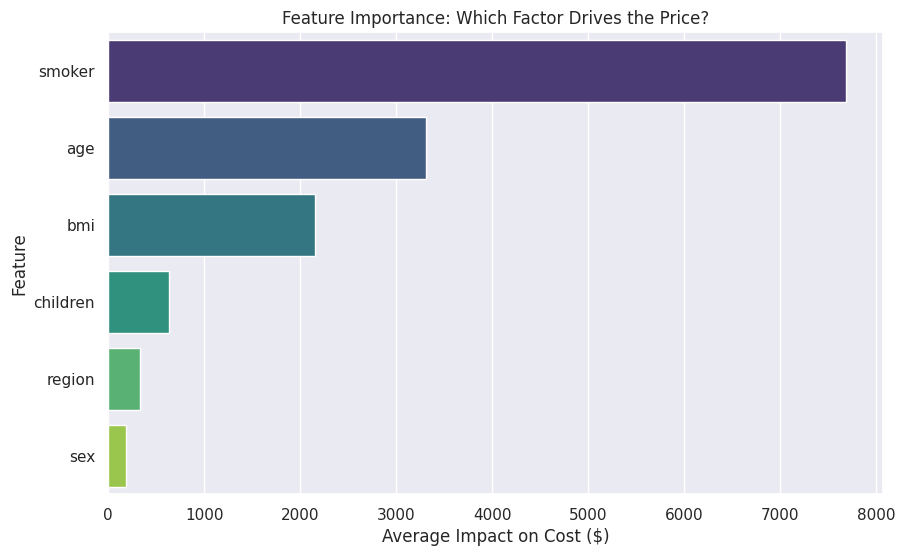

In [ ]:
import shap
# here we use Gradient Boosting
print("Training Best Model (Gradient Boosting)...")
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(x_train, y_train)

print("\nCalculating Feature Importance using SHAP...")

# SHAP Values
explainer = shap.TreeExplainer(gb_model)
shap_values = explainer.shap_values(x_test)

# average impact calculation
feature_names = x.columns
mean_shap_values = np.abs(shap_values).mean(axis=0)

# Dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Impact_Score': mean_shap_values
})
# Heighest to lower
importance_df = importance_df.sort_values(by='Impact_Score', ascending=False).reset_index(drop=True)

print(f"Most imporatant features is: '{importance_df.loc[0, 'Feature'].upper()}'\n")

print("Ranking (Impact in Dollar Amount $):")
for index, row in importance_df.iterrows():
    print(f"{index+1}. {row['Feature']:<10} : ${row['Impact_Score']:,.2f} impact on average")

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature Importance: Which Factor Drives the Price?")
# Bar Plot
sns.barplot(x='Impact_Score', y='Feature', data=importance_df, palette='viridis')
plt.xlabel("Average Impact on Cost ($)")
plt.show()



In [ ]:
import ipywidgets as widgets
from IPython.display import display

# handle  function
def retrain_all_models(model_name, n_estimators, learning_rate, max_depth, alpha):
    print(f"Selected Model: {model_name}")
    model = None

    # model selection
    if model_name == 'Linear Regression':
        print("Note: Linear Regression has no hyperparameters to tune.")
        model = LinearRegression()

    elif model_name == 'Ridge':
        print(f"Training with: alpha={alpha}")
        model = Ridge(alpha=alpha)

    elif model_name == 'Lasso':
        print(f"Training with: alpha={alpha}")
        model = Lasso(alpha=alpha)

    elif model_name == 'Decision Tree':
        print(f"Training with: max_depth={max_depth}")
        model = DecisionTreeRegressor(max_depth=int(max_depth), random_state=42)

    elif model_name == 'Random Forest':
        print(f"Training with: n_estimators={n_estimators}, max_depth={max_depth}")
        model = RandomForestRegressor(n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)

    elif model_name == 'Gradient Boosting':
        print(f"Training with: n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}")
        model = GradientBoostingRegressor(n_estimators=int(n_estimators), learning_rate=learning_rate, max_depth=int(max_depth), random_state=42)

    # if any model select
    if model:
        # train
        if model_name in ["Gradient Boosting", "Random Forest"]:
             model.fit(x_train, y_train.values.ravel())
        else:
             model.fit(x_train, y_train)

        # prediction
        pred = model.predict(x_test)
        r2 = r2_score(y_test, pred)
        mse = mean_squared_error(y_test, pred)

        print(f"Model: {model_name}")
        print(f"Accuracy (R2 Score): {r2 * 100:.2f}%")
        print(f"MSE: {mse:.2f}")

# drop down for model selection
model_dropdown = widgets.Dropdown(
    options=['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    value='Linear Regression',
    description='Model:',
)

# slider for different parameter
n_est_slider = widgets.IntSlider(min=10, max=500, step=10, value=100, description='Estimators:')
lr_slider = widgets.FloatSlider(min=0.01, max=1.0, step=0.01, value=0.1, description='Learn Rate:')
depth_slider = widgets.IntSlider(min=1, max=20, value=3, description='Max Depth:')
alpha_slider = widgets.FloatSlider(min=0.01, max=10.0, step=0.1, value=1.0, description='Alpha:')

# display
ui = widgets.VBox([model_dropdown, n_est_slider, lr_slider, depth_slider, alpha_slider])

# connect with function
out = widgets.interactive_output(retrain_all_models, {
    'model_name': model_dropdown,
    'n_estimators': n_est_slider,
    'learning_rate': lr_slider,
    'max_depth': depth_slider,
    'alpha': alpha_slider
})

display(ui, out)

Output()